# FINANCIAL DATA ANALYSIS


In [16]:
import numpy as np
import pandas as pd

In [5]:
#importing and reading the data
nifty50_data = pd.read_csv("nifty50_closing_prices.csv")

nifty50_data.head()

Date  RELIANCE.NS  HDFCBANK.NS  ICICIBANK.NS  \
0  2024-08-20 00:00:00+05:30  2991.899902  1637.699951   1179.449951   
1  2024-08-21 00:00:00+05:30  2997.350098  1625.800049   1174.849976   
2  2024-08-22 00:00:00+05:30  2996.250000  1631.300049   1191.099976   
3  2024-08-23 00:00:00+05:30  2999.949951  1625.050049   1203.500000   
4  2024-08-26 00:00:00+05:30  3025.199951  1639.949951   1213.300049   

       INFY.NS       TCS.NS  KOTAKBANK.NS  HINDUNILVR.NS      ITC.NS  \
0  1872.199951  4523.299805   1805.650024    2751.050049  498.799988   
1  1872.699951  4551.500000   1812.949951    2791.199951  505.399994   
2  1880.250000  4502.000000   1821.500000    2792.800049  504.549988   
3  1862.099976  4463.899902   1818.000000    2815.600098  505.799988   
4  1876.150024  4502.450195   1812.500000    2821.149902  505.700012   

         LT.NS  ...  HEROMOTOCO.NS   DRREDDY.NS   SHREECEM.NS  BRITANNIA.NS  \
0  3572.699951  ...    5244.399902  6965.350098  24730.550781   5765.799805   
1  3596.050049  ...    5284.700195  7062.450195  24808.050781   5837.350098   
2  3606.500000  ...    5329.950195  6969.049805  25012.400391   5836.799805   
3  3598.550049  ...    5384.899902  6954.500000  24706.050781   5792.649902   
4  3641.899902  ...    5343.750000  6943.299805  24906.449219   5796.950195   

       UPL.NS  EICHERMOT.NS   SBILIFE.NS  ADANIPORTS.NS  BAJAJ-AUTO.NS  \
0  566.150024   4883.250000  1761.300049    1492.550049    9779.700195   
1  568.299988   4913.549805  1800.599976    1503.500000    9852.000000   
2  579.150024   4933.549805  1795.250000    1492.300049    9914.200195   
3  573.700012   4898.100098  1789.300049    1491.300049   10406.450195   
4  577.450012   4875.200195  1796.250000    1482.550049   10432.549805   

   HINDALCO.NS  
0   672.900024  
1   685.599976  
2   685.549988  
3   685.099976  
4   711.849976  

[5 rows x 51 columns]

In [6]:
# check for missing values
missing_values = nifty50_data.isnull().sum()

# check for date column format
date_format_check = pd.to_datetime(nifty50_data['Date'], errors='coerce').notna().all()

# check if the data has sufficient rows for time-series analysis
sufficient_rows = nifty50_data.shape[0] >= 20  # Minimum rows needed for rolling/moving averages

# preparing a summary of the checks
data_preparation_status = {
    "Missing Values in Columns": missing_values[missing_values > 0].to_dict(),
    "Date Column Format Valid": date_format_check,
    "Sufficient Rows for Time-Series Analysis": sufficient_rows
}

data_preparation_status

{'Missing Values in Columns': {'HDFC.NS': 24},
 'Date Column Format Valid': np.True_,
 'Sufficient Rows for Time-Series Analysis': True}

In [7]:
# drop the HDFC.NS column since it contains 100% missing values
nifty50_data = nifty50_data.drop(columns=['HDFC.NS'])

# convert the 'Date' column to datetime format
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])

# sort the dataset by date to ensure proper time-series order
nifty50_data = nifty50_data.sort_values(by='Date')

# reset index for a clean dataframe
nifty50_data.reset_index(drop=True, inplace=True)

In [8]:
# calculate descriptive statistics
descriptive_stats = nifty50_data.describe().T  # Transpose for better readability
descriptive_stats = descriptive_stats[['mean', 'std', 'min', 'max']]
descriptive_stats.columns = ['Mean', 'Std Dev', 'Min', 'Max']
print(descriptive_stats)

                       Mean     Std Dev           Min           Max
RELIANCE.NS     2976.912506   41.290551   2903.000000   3041.850098
HDFCBANK.NS     1652.339579   28.258220   1625.050049   1741.199951
ICICIBANK.NS    1236.770818   36.438726   1174.849976   1338.449951
INFY.NS         1914.558324   30.240685   1862.099976   1964.500000
TCS.NS          4478.349976   70.822718   4284.899902   4553.750000
KOTAKBANK.NS    1809.422918   32.936318   1764.150024   1904.500000
HINDUNILVR.NS   2845.333344   65.620694   2751.050049   2977.600098
ITC.NS           507.739581    5.472559    497.299988    519.500000
LT.NS           3647.099976   60.511574   3536.949951   3793.899902
SBIN.NS          802.233332   17.442330    768.599976    824.799988
BAJFINANCE.NS   7203.118754  306.658594   6722.200195   7631.100098
BHARTIARTL.NS   1572.574997   67.346274   1449.150024   1711.750000
HCLTECH.NS      1753.743744   46.874886   1661.449951   1813.750000
ASIANPAINT.NS   3231.654175   88.793647   3103.1

**PORTFOLIO ANALYSIS**

In [9]:
# assign weights to a subset of stocks (example: RELIANCE.NS, HDFCBANK.NS, ICICIBANK.NS)
weights = [0.4, 0.35, 0.25]
portfolio_data = nifty50_data[['RELIANCE.NS', 'HDFCBANK.NS', 'ICICIBANK.NS']]

# calculate daily returns
daily_returns = portfolio_data.pct_change().dropna()

# calculate portfolio returns
portfolio_returns = (daily_returns * weights).sum(axis=1)

# display portfolio returns
portfolio_returns.head()

1   -0.002790
2    0.004495
3    0.001756
4    0.008612
5   -0.000994
dtype: float64

In [10]:
# Calculate standard deviation (volatility)
volatility = daily_returns.std()

# Calculate VaR (95% confidence level)
confidence_level = 0.05
VaR = daily_returns.quantile(confidence_level)

# Display risk metrics
risk_metrics = pd.DataFrame({'Volatility (Std Dev)': volatility, 'Value at Risk (VaR)': VaR})
print(risk_metrics)

              Volatility (Std Dev)  Value at Risk (VaR)
RELIANCE.NS               0.008708            -0.013624
HDFCBANK.NS               0.006901            -0.005987
ICICIBANK.NS              0.011594            -0.008577


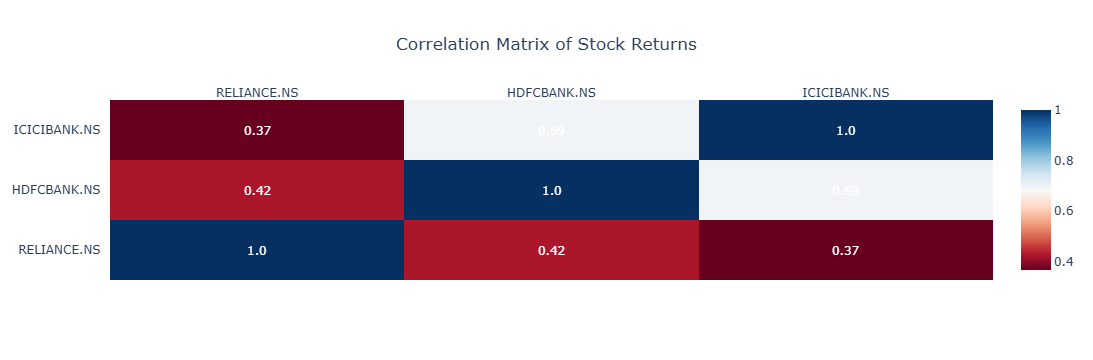

In [11]:
import plotly.figure_factory as ff

# calculate correlation matrix
correlation_matrix = daily_returns.corr()

fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='RdBu', 
    showscale=True
)

fig.update_layout(
    title="Correlation Matrix of Stock Returns",
    title_x=0.5,
    font=dict(size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
)

fig.show()

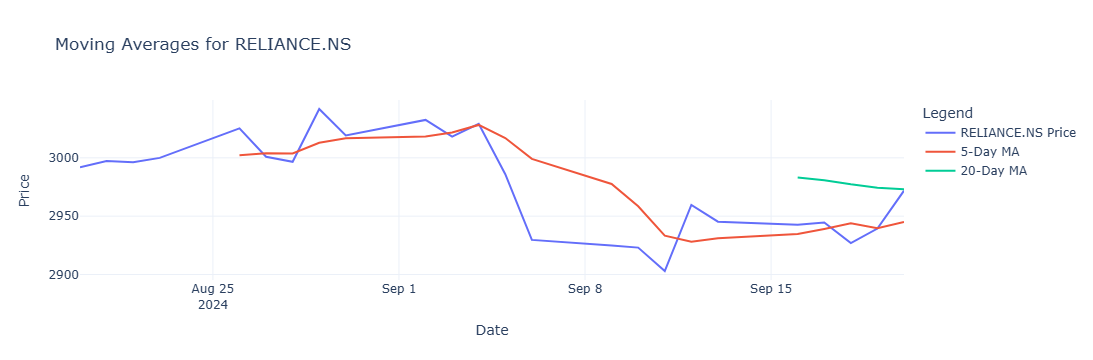

In [12]:
import plotly.graph_objects as go

# calculate moving averages for RELIANCE
nifty50_data['RELIANCE_5d_MA'] = nifty50_data['RELIANCE.NS'].rolling(window=5).mean()
nifty50_data['RELIANCE_20d_MA'] = nifty50_data['RELIANCE.NS'].rolling(window=20).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=nifty50_data['Date'],
    y=nifty50_data['RELIANCE.NS'],
    mode='lines',
    name='RELIANCE.NS Price'
))

fig.add_trace(go.Scatter(
    x=nifty50_data['Date'],
    y=nifty50_data['RELIANCE_5d_MA'],
    mode='lines',
    name='5-Day MA'
))

fig.add_trace(go.Scatter(
    x=nifty50_data['Date'],
    y=nifty50_data['RELIANCE_20d_MA'],
    mode='lines',
    name='20-Day MA'
))

fig.update_layout(
    title="Moving Averages for RELIANCE.NS",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_white",
    legend=dict(title="Legend")
)

fig.show()

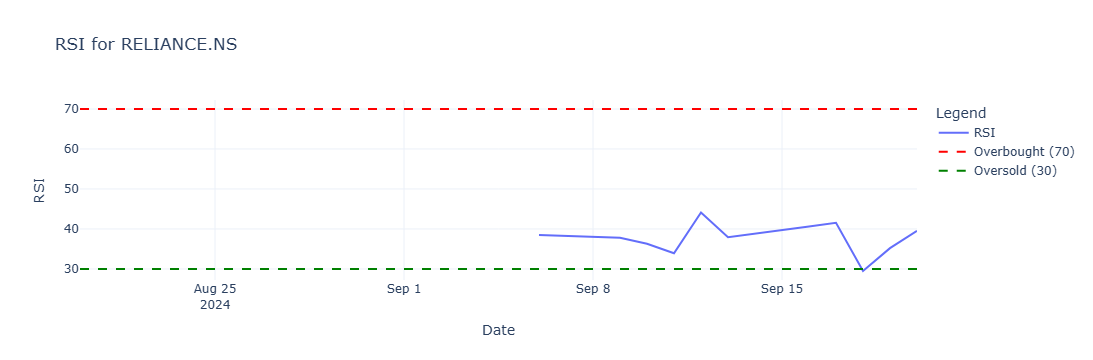

In [13]:
# RSI calculation function
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# calculate RSI for RELIANCE
nifty50_data['RELIANCE_RSI'] = calculate_rsi(nifty50_data['RELIANCE.NS'])

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=nifty50_data['Date'],
    y=nifty50_data['RELIANCE_RSI'],
    mode='lines',
    name='RSI'
))

fig.add_trace(go.Scatter(
    x=nifty50_data['Date'],
    y=[70] * len(nifty50_data['Date']),
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Overbought (70)'
))

fig.add_trace(go.Scatter(
    x=nifty50_data['Date'],
    y=[30] * len(nifty50_data['Date']),
    mode='lines',
    line=dict(color='green', dash='dash'),
    name='Oversold (30)'
))

fig.update_layout(
    title="RSI for RELIANCE.NS",
    xaxis_title="Date",
    yaxis_title="RSI",
    template="plotly_white",
    legend=dict(title="Legend")
)

fig.show()

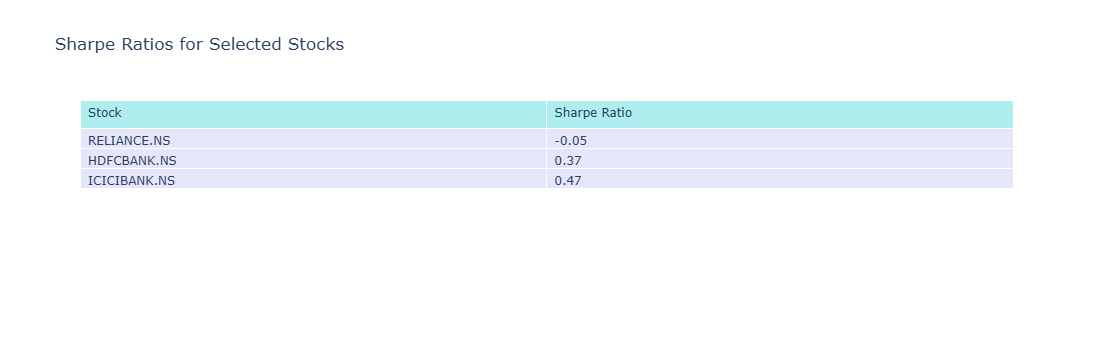

In [14]:
# calculate average returns and volatility
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# assume a risk-free rate
risk_free_rate = 0.04 / 252

# calculate sharpe ratio
sharpe_ratios = (mean_returns - risk_free_rate) / volatility

table_data = pd.DataFrame({
    'Stock': sharpe_ratios.index,
    'Sharpe Ratio': sharpe_ratios.values.round(2)
})

fig = go.Figure(data=[go.Table(
    header=dict(values=['Stock', 'Sharpe Ratio'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[table_data['Stock'], table_data['Sharpe Ratio']],
               fill_color='lavender',
               align='left')
)])

fig.update_layout(
    title="Sharpe Ratios for Selected Stocks",
    template="plotly_white"
)

fig.show()

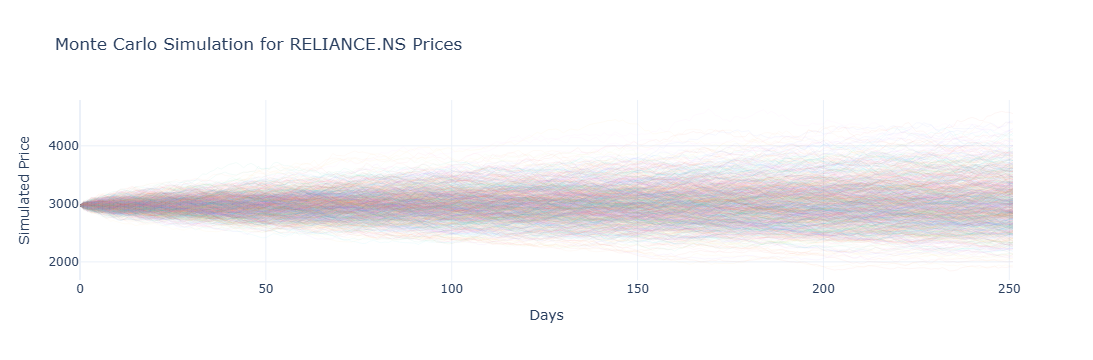

In [15]:
# monte carlo simulation for RELIANCE
num_simulations = 1000
num_days = 252
last_price = nifty50_data['RELIANCE.NS'].iloc[-1]
simulated_prices = np.zeros((num_simulations, num_days))
volatility = nifty50_data['RELIANCE.NS'].pct_change().std()

for i in range(num_simulations):
    simulated_prices[i, 0] = last_price
    for j in range(1, num_days):
        simulated_prices[i, j] = simulated_prices[i, j - 1] * np.exp(
            np.random.normal(0, volatility)
        )

fig = go.Figure()

for i in range(num_simulations):
    fig.add_trace(go.Scatter(
        x=list(range(num_days)),
        y=simulated_prices[i],
        mode='lines',
        line=dict(width=0.5),
        opacity=0.1,
        showlegend=False
    ))

fig.update_layout(
    title="Monte Carlo Simulation for RELIANCE.NS Prices",
    xaxis_title="Days",
    yaxis_title="Simulated Price",
    template="plotly_white"
)

fig.show()